In [ ]:
!pip install tensorflow
!pip install streamlit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2024-01-24'
stock = 'HDFCBANK.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,214.449997,214.899994,209.750000,213.425003,195.259399,3514998
1,2012-01-03,215.699997,220.449997,215.000000,219.574997,200.885941,3439238
2,2012-01-04,220.949997,222.475006,215.425003,221.649994,202.784302,4871478
3,2012-01-05,222.000000,223.350006,220.149994,221.824997,202.944427,3380606
4,2012-01-06,220.500000,228.574997,219.475006,226.649994,207.358734,3977222
...,...,...,...,...,...,...,...
2970,2024-01-17,1570.000000,1596.800049,1528.400024,1537.500000,1537.500000,85072618
2971,2024-01-18,1494.000000,1515.000000,1480.050049,1486.150024,1486.150024,80535465
2972,2024-01-19,1505.949951,1510.250000,1468.400024,1470.650024,1470.650024,54800269
2973,2024-01-22,1470.650024,1470.650024,1470.650024,1470.650024,1470.650024,0


In [5]:
ma_100_days = data.Close.rolling(100).mean()

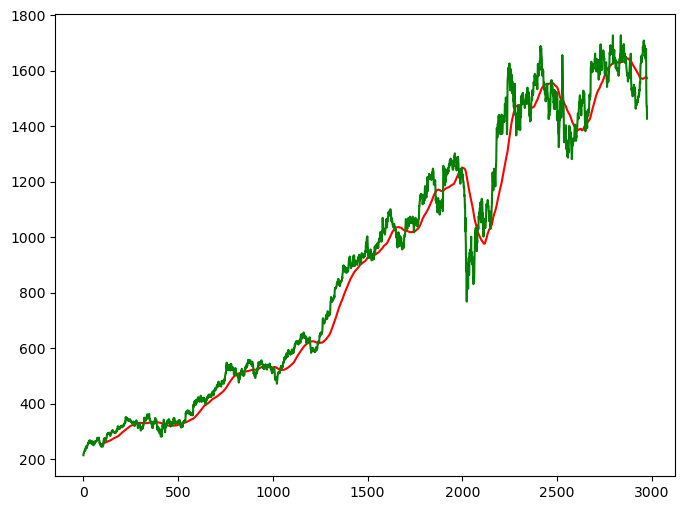

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

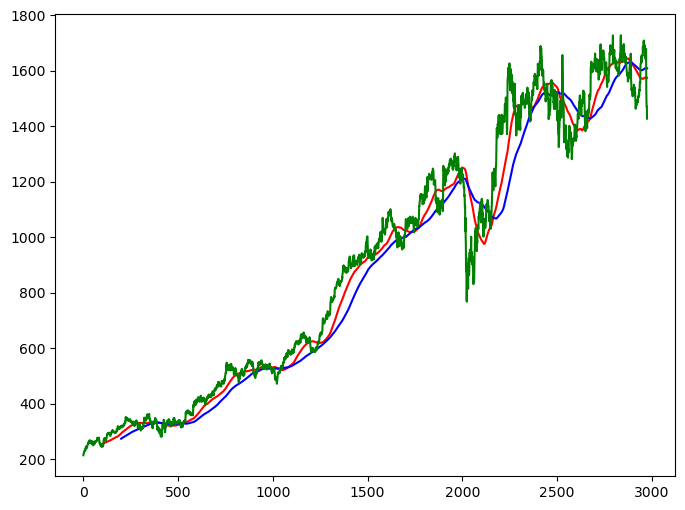

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2380

In [12]:
data_test.shape[0]

595

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [ ]:
!pip install keras

In [17]:
import tensorflow as tf
tf.compat.v1.losses.sparse_softmax_cross_entropy

<function tensorflow.python.ops.losses.losses_impl.sparse_softmax_cross_entropy(labels, logits, weights=1.0, scope=None, loss_collection='losses', reduction='weighted_sum_by_nonzero_weights')>

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
tf.compat.v1.get_default_graph

<function tensorflow.python.framework.ops.get_default_graph() -> tensorflow.python.framework.ops.Graph>

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [21]:
tf.compat.v1.train.Optimizer

tensorflow.python.training.optimizer.Optimizer

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50

72/72 [==============================] - 20s 214ms/step - loss: 0.0333
Epoch 2/50
72/72 [==============================] - 15s 203ms/step - loss: 0.0079
Epoch 3/50
72/72 [==============================] - 14s 199ms/step - loss: 0.0060
Epoch 4/50
72/72 [==============================] - 15s 214ms/step - loss: 0.0059
Epoch 5/50
72/72 [==============================] - 16s 216ms/step - loss: 0.0058
Epoch 6/50
72/72 [==============================] - 14s 188ms/step - loss: 0.0052
Epoch 7/50
72/72 [==============================] - 13s 180ms/step - loss: 0.0046
Epoch 8/50
72/72 [==============================] - 16s 222ms/step - loss: 0.0056
Epoch 9/50
72/72 [==============================] - 12s 169ms/step - loss: 0.0050
Epoch 10/50
72/72 [==============================] - 11s 153ms/step - loss: 0.0044
Epoch 11/50
72/72 [==============================] - 13s 184ms/step - loss: 0.0041
Epoch 12/50
72/72 [==============================] - 15s 205ms/step - loss: 0.0040
Epoch 13/50


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
recent_500_days = data_train.tail(500)

In [26]:
data_test = pd.concat([recent_500_days, data_test], ignore_index=True)

In [27]:
data_test_scale  =  scaler.fit_transform(data_test)

In [28]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [29]:
y_predict = model.predict(x)

32/32 [==============================] - 3s 67ms/step


In [30]:
scale =1/scaler.scale_

In [31]:
y_predict = y_predict*scale

In [32]:
y = y*scale

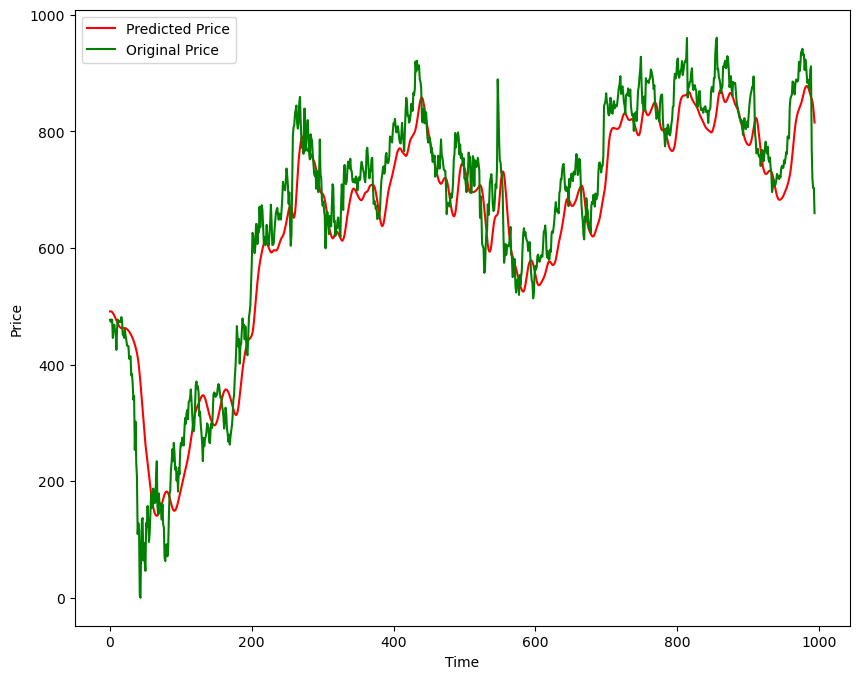

In [33]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(y, y_predict))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 66.49477876073534


In [35]:
model.save('Stock Predictions Model.keras')